# Plot saved result

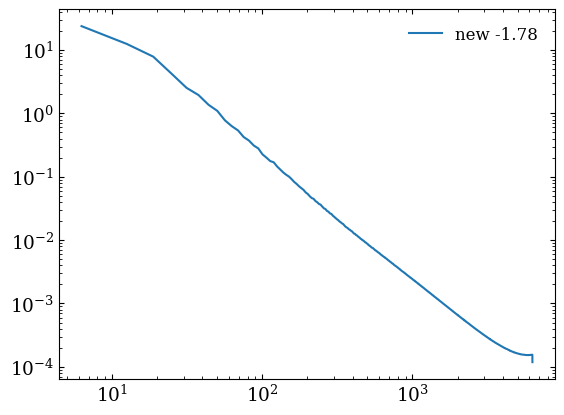

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots()
pk = np.loadtxt('../scripts/Pk2000.txt')
power, a = np.polyfit(np.log10(pk[:,0]), np.log10(pk[:,1]), 1) # linear fit
ax.loglog(pk[:,0], pk[:,1], label=f'new {power:.2f}')
plt.legend()
plt.show()

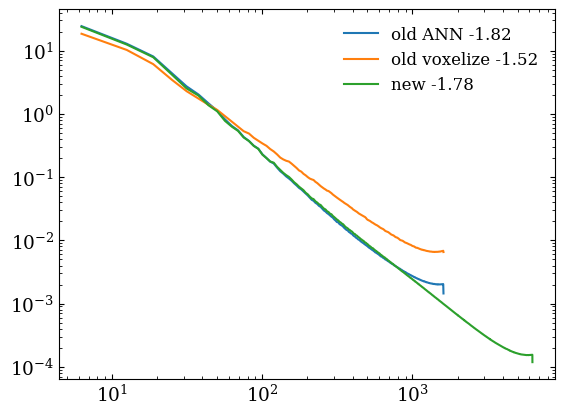

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots()
pk = np.loadtxt('./Pk_nn.txt')
power, a = np.polyfit(np.log10(pk[:,0]), np.log10(pk[:,1]), 1) # linear fit
ax.loglog(pk[:,0], pk[:,1], label=f'old ANN {power:.2f}')

pk = np.loadtxt('./Pk_vox.txt')
power, a = np.polyfit(np.log10(pk[:,0]), np.log10(pk[:,1]), 1) # linear fit
ax.loglog(pk[:,0], pk[:,1], label=f'old voxelize {power:.2f}')

pk = np.loadtxt('../scripts/Pk2000.txt')
power, a = np.polyfit(np.log10(pk[:,0]), np.log10(pk[:,1]), 1) # linear fit
ax.loglog(pk[:,0], pk[:,1], label=f'new {power:.2f}')
plt.legend()
plt.show()

For comparison between the new parallelized code and our old code using ANN, and Voxelize. We will run the old interpolation and FFT computation here and compare with our saved results. It might take a while! (16 min for ANN and 1min for Voxelize)

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../vpower')
from spctrm import *
from interp import *

libvoxelize_gpu.so found but some library not found : /home/ohhhhhhhhjay/.local/lib/python3.11/site-packages/voxelize/libvoxelize_gpu.so: cannot open shared object file: No such file or directory
Will continue with CPU-only version.
Only the CPU-only flavour of Voxelize is available!


In [2]:
SNAPSHOT = '/appalachia/d5/DISK/from_pleiades/snapshots/gmcs0_wind0_gmc9/snapshot_550.hdf5'
NTOT = 512 # total resolution. The dynamical range would be 256, from 2pi/NTOT to pi/LCELL

In [3]:
p = load_snapshot(SNAPSHOT)
f = p.ann_interp_to_field(Nsize=NTOT)

In [4]:
spctrm = f.spctrm()

Specific kinetic energy before FFT: 4.93e+02
Specific kinetic energy after FFT: 4.93e+02
Conserved quantity after sampling: 4.01e+02


In [5]:
f_v = p.voxelize_interp_to_field(Nsize=NTOT)
spctrm_v = f_v.spctrm()

Padded Lbox:  1.0708226190983035 Nsize:  548


OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
root_add_process : started ...
workers_process : started ...
workers using 35 threads.
Workers processed 334119224 numbers, of which were
	0.000e+00 exact calculations (R<Rmin),
	2.708e+08 exact calculations (R>Rmax),
	6.329e+07 trivial calculations,
	0.000e+00 interpolations.

workers_process : ended.
Root processed 334119224 numbers in 10214 CPU-chunks.
root_add_process : ended.
voxelize_gpu function took 55.5836 seconds
In the end, 0 in cpu_queue
/appalachia/d6/yujie/Test_PowerSpec/tests/../vpower/interp.py:326: RuntimeWarning: invalid value encountered in divide
  v_grid = vec_grid[..., :3] / vec_grid[..., 3, None]     # divide by mass


Specific kinetic energy before FFT: 4.25e+02
Specific kinetic energy after FFT: 4.25e+02
Conserved quantity after sampling: 3.52e+02


In [6]:
import numpy as np
np.sum(np.isnan(f_v.get_data()))

0

In [29]:
up = -1
power1, a = np.polyfit(np.log10(pk[2:up,0]), np.log10(pk[2:up,1]), 1) # linear fit
power2, a = np.polyfit(np.log10(spctrm.data()[2:up,0]), np.log10(spctrm.data()[2:up,1]), 1)
power3, a = np.polyfit(np.log10(spctrm_v.data()[2:up,0]), np.log10(spctrm_v.data()[2:up,1]), 1)
print(power1, power2, power3)

-1.7829317270091969 -1.8138058663914174 -1.5136317926543206


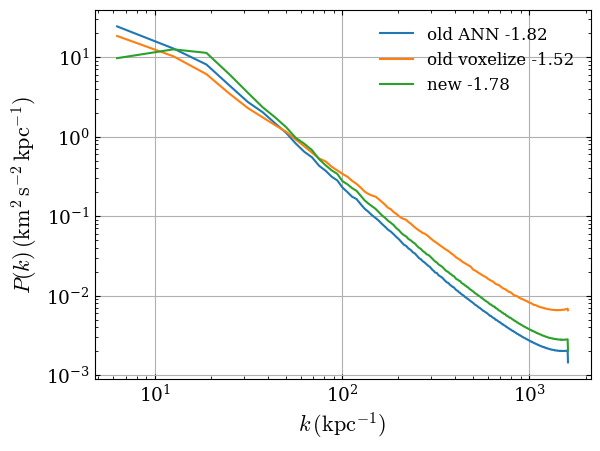

In [18]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('./nice.mplstyle')
fig, ax = plt.subplots()
spctrm.plot(label=f'old ANN {spctrm.index():.2f}', ax=ax)
spctrm_v.plot(label=f'old voxelize {spctrm_v.index():.2f}', ax=ax)
pk = np.loadtxt('../scripts/Pk2000.txt')
power, a = np.polyfit(np.log10(pk[:,0]), np.log10(pk[:,1]), 1) # linear fit
ax.loglog(pk[:,0], pk[:,1], label=f'new {power:.2f}')
plt.legend()
plt.show()